# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [33]:
# Write your answer here
print("June Yun")


June Yun


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [34]:
# Write your answer here:
print("I will abide by Emory's code of conduct")



I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [35]:
# Write your answer here
# "pandas" processes datasets
# "maplotlib.pyplot" generates graphs

import pandas as pd
import matplotlib.pyplot as plt



<font size = "5">

In this quiz you will work with exchange rate data on bitcoin, <br>
for two exchange platforms:

- 1 coin base bit coin (CB) to dollar (USD)
- 1 ethereum bit coin (ET) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "bitcoin.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [36]:
# Write your own code
bitcoin        = pd.read_csv("data_raw/bitcoin.csv")
bitcoin["date"] = pd.to_datetime(bitcoin["date_string"])
bitcoin["month_str"] = bitcoin["date"].dt.strftime("%m")
bitcoin["week_str"]  = bitcoin["date"].dt.strftime("%W")
bitcoin["year_str"]  = bitcoin["date"].dt.strftime("%Y")

bitcoin

,date_string,cb_to_usd,et_to_usd,date,month_str,week_str,year_str
0,"2016 May 18, Wednesday",455.56,13.18,2016-05-18,05,20,2016
1,"2016 May 19, Thursday",438.38,14.90,2016-05-19,05,20,2016
2,"2016 May 20, Friday",445.65,14.17,2016-05-20,05,20,2016
3,"2016 May 21, Saturday",446.28,NaN,2016-05-21,05,20,2016
4,"2016 May 22, Sunday",442.48,NaN,2016-05-22,05,20,2016
...,...,...,...,...,...,...,...
2513,"2023 Apr 05, Wednesday",28187.68,1910.39,2023-04-05,04,14,2023
2514,"2023 Apr 06, Thursday",28053.47,1873.51,2023-04-06,04,14,2023
2515,"2023 Apr 07, Friday",27927.15,1864.71,2023-04-07,04,14,2023
2516,"2023 Apr 08, Saturday",27959.50,1850.01,2023-04-08,04,14,2023


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "cb_to_usd" and "et_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 CoinBase bitcoin to USD" <br>
and "1 Ethereum bitcoin to USD"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```

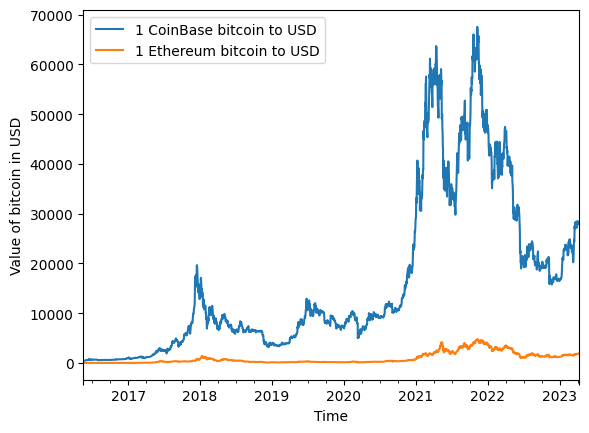

In [37]:
# Write your own code
# create a line plot which has "cb_to_usd" and "et_to_usd" on the y-axis and the date on the x-axis
bitcoin[["date","cb_to_usd","et_to_usd"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of bitcoin in USD")
plt.legend(["1 CoinBase bitcoin to USD","1 Ethereum bitcoin to USD"])



<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_cb" which computes the percentage daily <br>
growth rate of "cb_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 22

In [38]:
# Write your own code
bitcoin["diff_cb_to_usd"] = bitcoin["cb_to_usd"].diff()
print(bitcoin["diff_cb_to_usd"].head())
bitcoin["diff_et_to_usd"] = bitcoin["et_to_usd"].diff()
print(bitcoin["diff_et_to_usd"].head())

bitcoin["lag_cb_to_usd"]    = bitcoin["cb_to_usd"].shift(1)
bitcoin["growth_cb_to_usd"] = bitcoin["diff_cb_to_usd"]* 100/bitcoin["lag_cb_to_usd"]

bitcoin["lag_et_to_usd"]    = bitcoin["et_to_usd"].shift(1)
bitcoin["growth_et_to_usd"] = bitcoin["diff_et_to_usd"]* 100/bitcoin["lag_et_to_usd"]

0      NaN
1   -17.18
2     7.27
3     0.63
4    -3.80
Name: diff_cb_to_usd, dtype: float64
0     NaN
1    1.72
2   -0.73
3     NaN
4     NaN
Name: diff_et_to_usd, dtype: float64


<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_cb" had a value greater than 15 or less than -15
- Generate a line plot with the "growth_cb" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



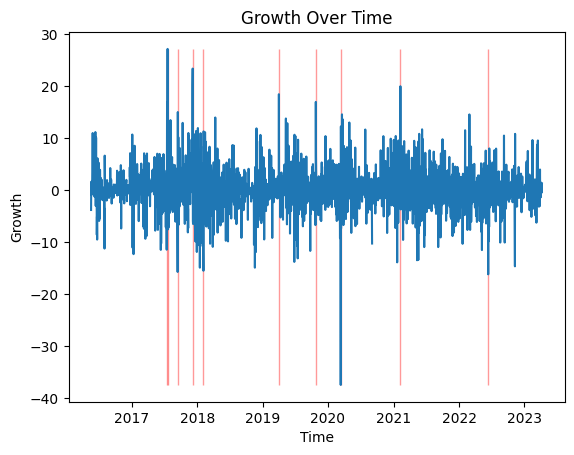

In [39]:
# Write your own code
# create a boolean column (True/False) "bool_cond which checks whether "growth_cb" has a value greater than 15 or less than -15
bitcoin["bool_cond"] = (bitcoin['growth_cb_to_usd'] > 15) | (bitcoin['growth_cb_to_usd'] < -15)

plt.plot(bitcoin['date'], bitcoin['growth_cb_to_usd'])
plt.xlabel('Time')
plt.ylabel('Growth')
plt.title('Growth Over Time')

vec_y = bitcoin["growth_cb_to_usd"]
plt.fill_between(x=bitcoin["date"],
                 y1=vec_y.min(),
                 y2=vec_y.max(),
                 where=bitcoin["bool_cond"],
                 alpha=0.4,
                 color="red")

plt.show()

<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "cb_to_usd"
- Display the dataset




In [40]:
# Write your own code
month_config = pd.Grouper(key='date', freq='M')
monthly_std = bitcoin.groupby(month_config)['cb_to_usd'].std()

# display dataset
print(monthly_std)


date
2016-05-31      37.522931
2016-06-30      67.727627
2016-07-31      13.843294
2016-08-31      11.616248
2016-09-30      10.997678
                 ...     
2022-12-31     317.869463
2023-01-31    2655.277513
2023-02-28     947.762915
2023-03-31    2826.126499
2023-04-30     208.113245
Freq: M, Name: cb_to_usd, Length: 84, dtype: float64


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["cb_to_usd","et_to_usd"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [41]:
# Write your own code
bitcoin_long = pd.melt(bitcoin, 
                        id_vars='date', 
                        value_vars=['cb_to_usd', 'et_to_usd'], 
                        var_name='type', 
                        value_name='exchange_rate')

# display the dataset
print(bitcoin_long)


           date       type  exchange_rate
0    2016-05-18  cb_to_usd         455.56
1    2016-05-19  cb_to_usd         438.38
2    2016-05-20  cb_to_usd         445.65
3    2016-05-21  cb_to_usd         446.28
4    2016-05-22  cb_to_usd         442.48
...         ...        ...            ...
5031 2023-04-05  et_to_usd        1910.39
5032 2023-04-06  et_to_usd        1873.51
5033 2023-04-07  et_to_usd        1864.71
5034 2023-04-08  et_to_usd        1850.01
5035 2023-04-09  et_to_usd        1858.23

[5036 rows x 3 columns]
